In [15]:
!ls DATA/RAW

0-2-C0.tif  0-C0.tif  2-C0.tif	-4-C0.tif  -4-C1.tif
0-2-C1.tif  0-C1.tif  2-C1.tif	4-C0.tif   4-C1.tif


In [1]:
import cv2

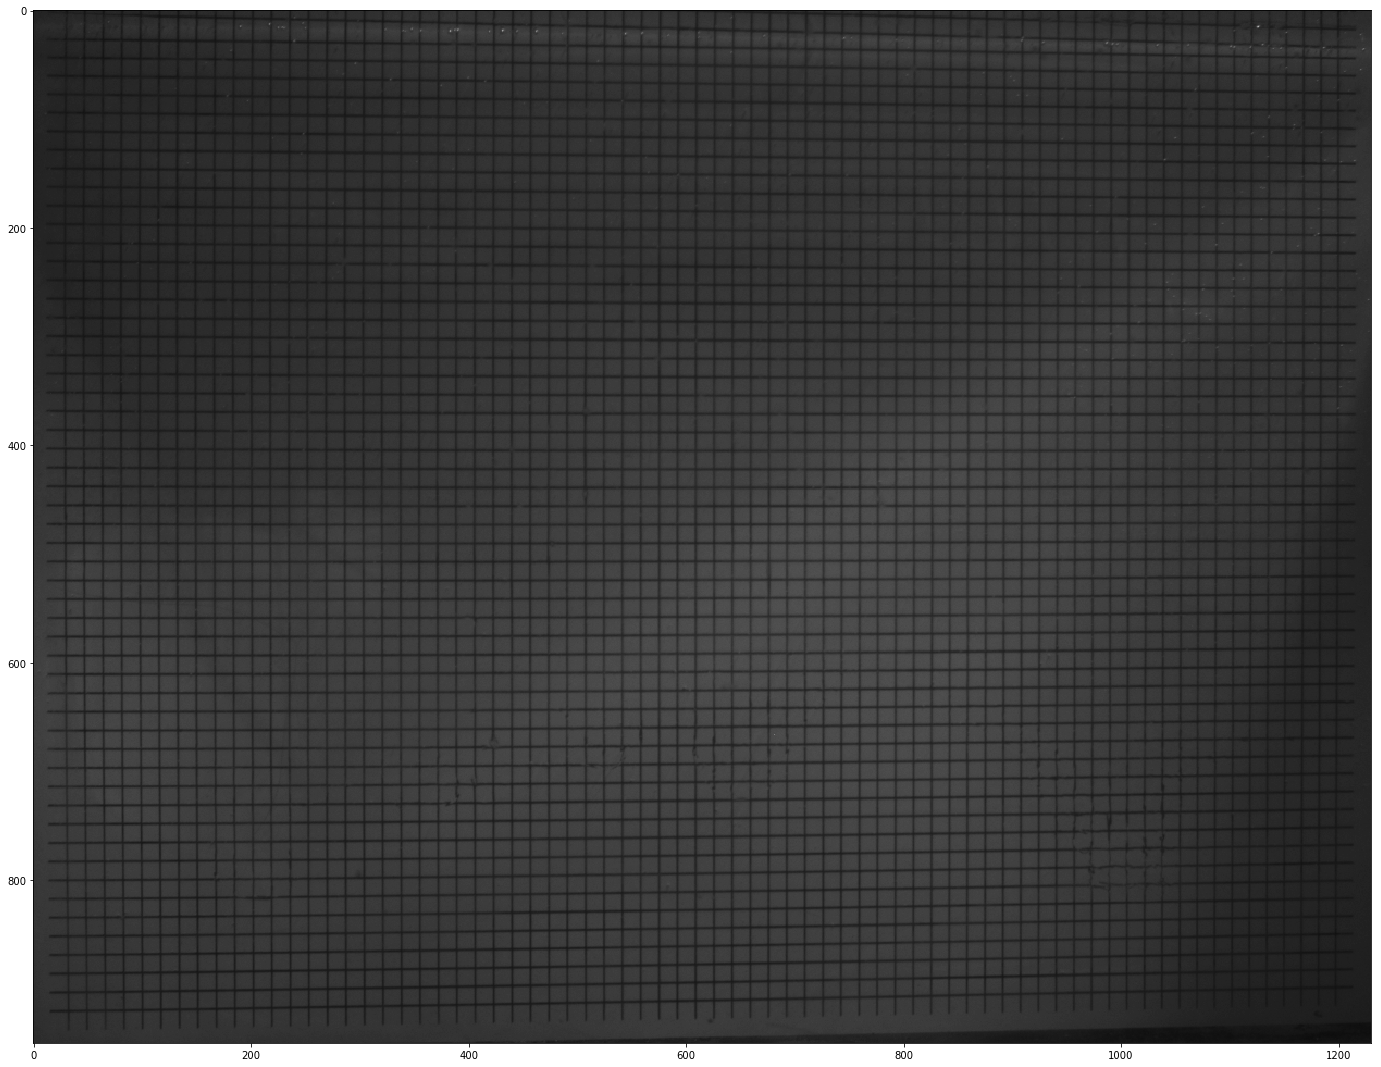

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
# base="/home/xbao/LAB_test/notebook/"
bpath="DATA/RAW"
file_path =  bpath+"/0-2-C0.tif"
im1 = np.asarray(Image.open(
    file_path).convert('L') ) * 1.0 / 255.0
# im2 = np.asarray(Image.open(
#     lists[1]).convert('L') ) * 1.0 / 255.0
im1 =im1[220:1170,180:1410]
# im2 =im2[58:691,380:940]
imdim = list(im1.shape)
plt.figure(figsize=(imdim[1]*0.02,imdim[0]*0.02))
plt.imshow(im1,cmap="gray",vmin=0,vmax=1)
# plt.axis('off')

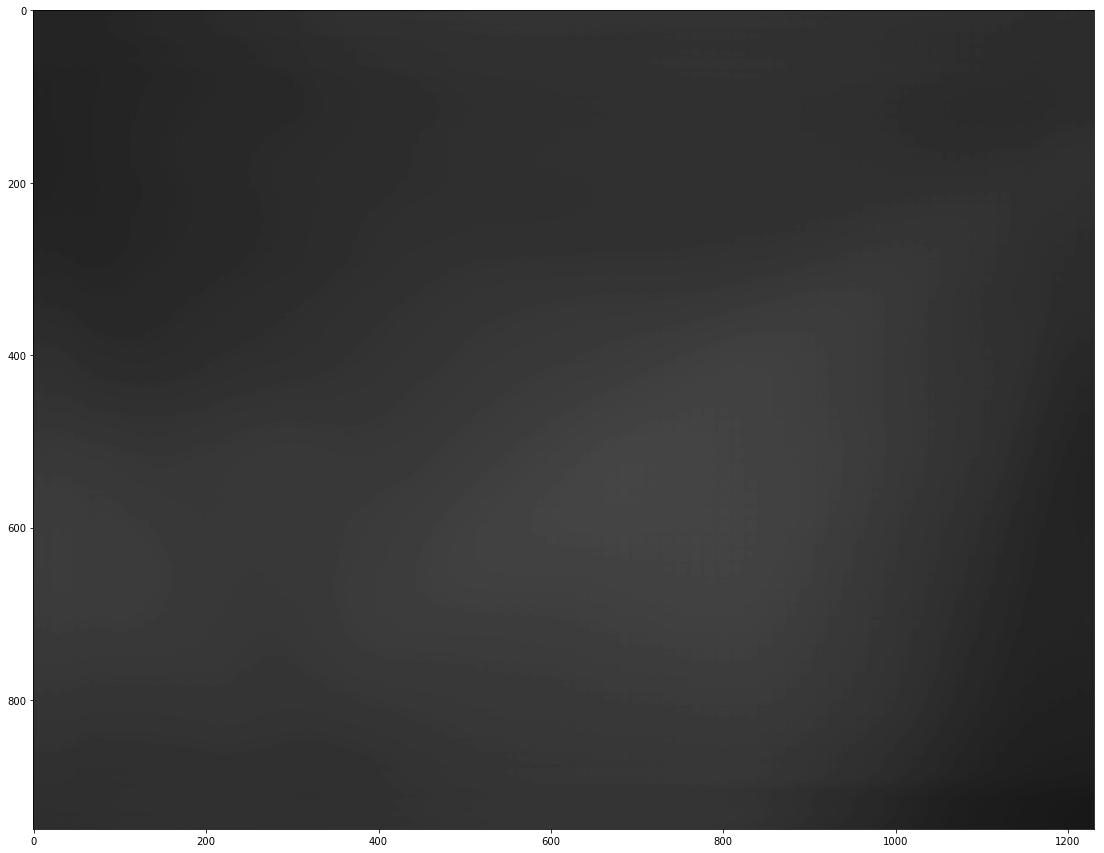

In [17]:
crc=im1.copy()
# for i in range(1):
#     crc=cv2.medianBlur(np.float32(crc),3)
#     crc=cv2.medianBlur(np.float32(crc),5)
mind,maxd=np.min(crc),np.max(crc)
crc8=np.uint8((crc-mind)/(maxd-mind)*255)

medianimg_new = cv2.fastNlMeansDenoising(crc8,20,100,7,100)

medianimg_new = (medianimg_new/255.0)*(maxd-mind)+mind
plt.figure(figsize=(imdim[0]*0.02,imdim[1]*0.02))
plt.imshow(medianimg_new,cmap="gray",vmin=0,vmax=1)    

Text(0.5,1,"Histogram with 'auto' bins")

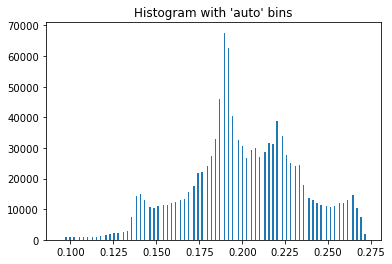

In [18]:
_ = plt.hist(medianimg_new.flatten(), bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")

Text(0.5,1,"Histogram with 'auto' bins")

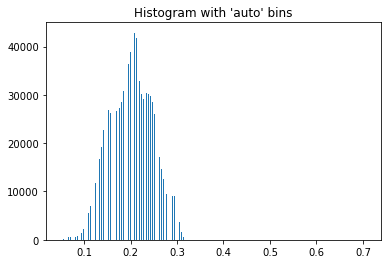

In [19]:
_ = plt.hist(im1.flatten(), bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")

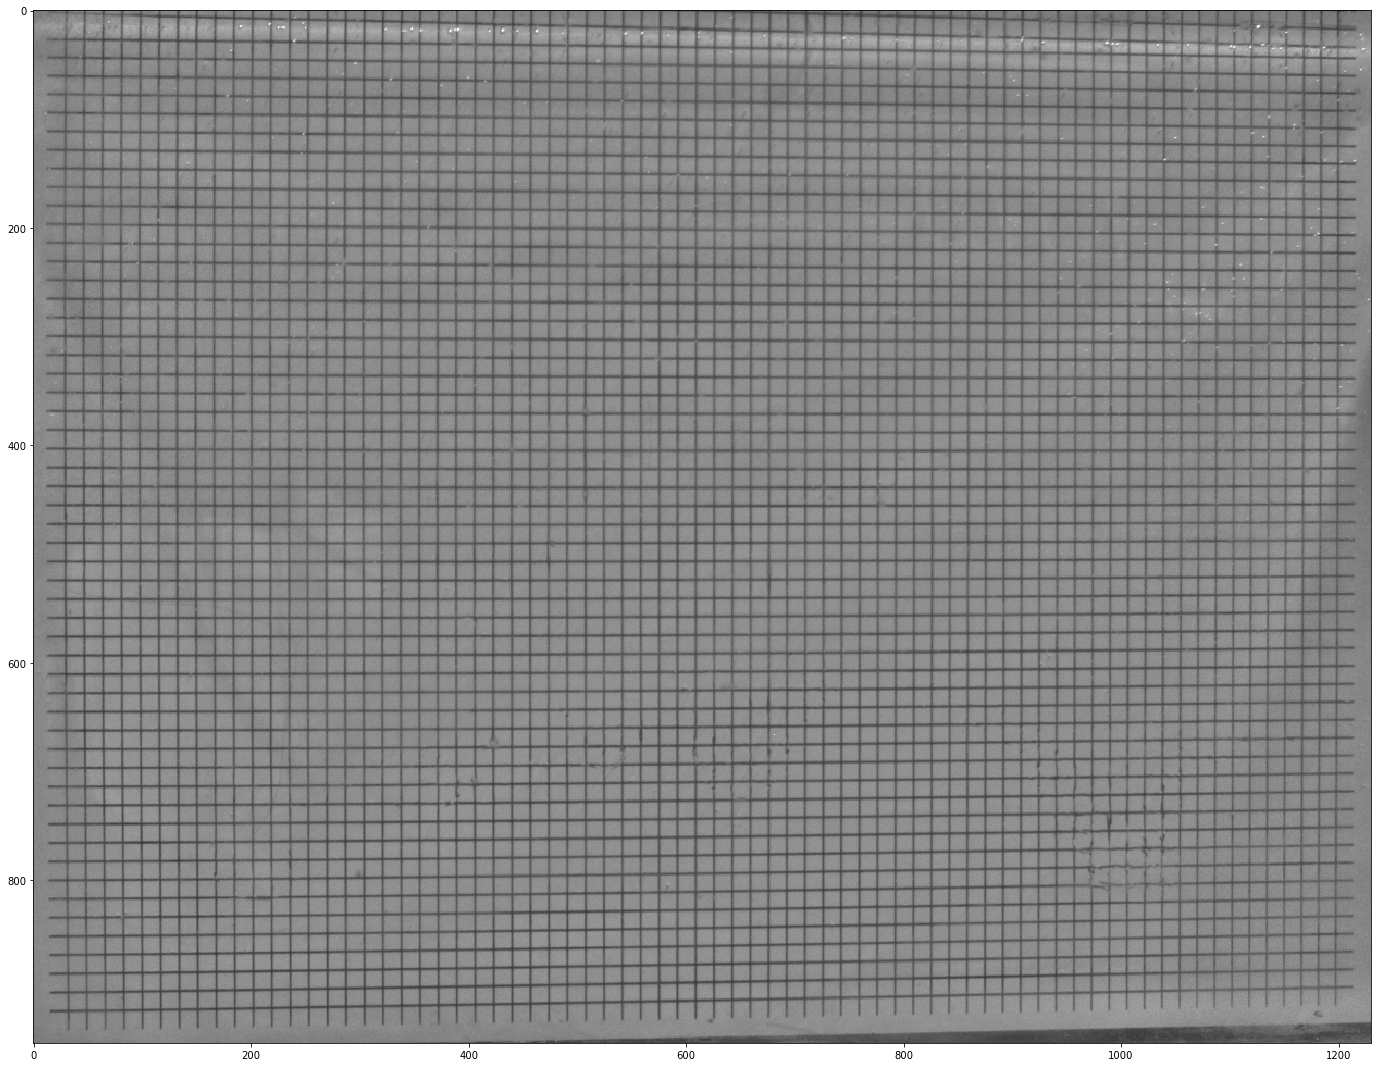

In [20]:
ratio=0.5/medianimg_new
plt.figure(figsize=(imdim[1]*0.02,imdim[0]*0.02))
plt.imshow(im1*ratio,cmap="gray",vmin=0,vmax=1)

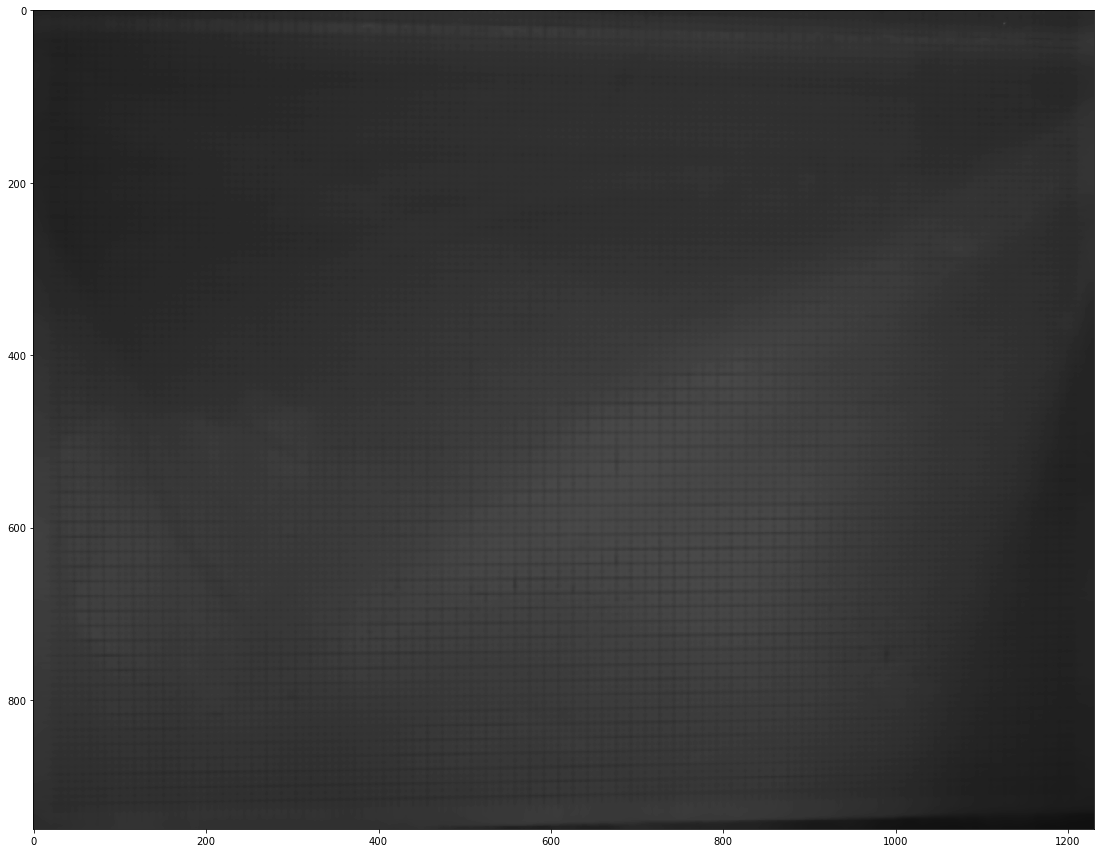

In [23]:
crc=im1.copy()
# for i in range(1):
#     crc=cv2.medianBlur(np.float32(crc),3)
#     crc=cv2.medianBlur(np.float32(crc),5)
mind,maxd=np.min(crc),np.max(crc)
crc8=np.uint8((crc-mind)/(maxd-mind)*255)

medianimg_new = cv2.fastNlMeansDenoising(crc8,20,20,7,21)

medianimg_new = (medianimg_new/255.0)*(maxd-mind)+mind
plt.figure(figsize=(imdim[0]*0.02,imdim[1]*0.02))
plt.imshow(medianimg_new,cmap="gray",vmin=0,vmax=1)    

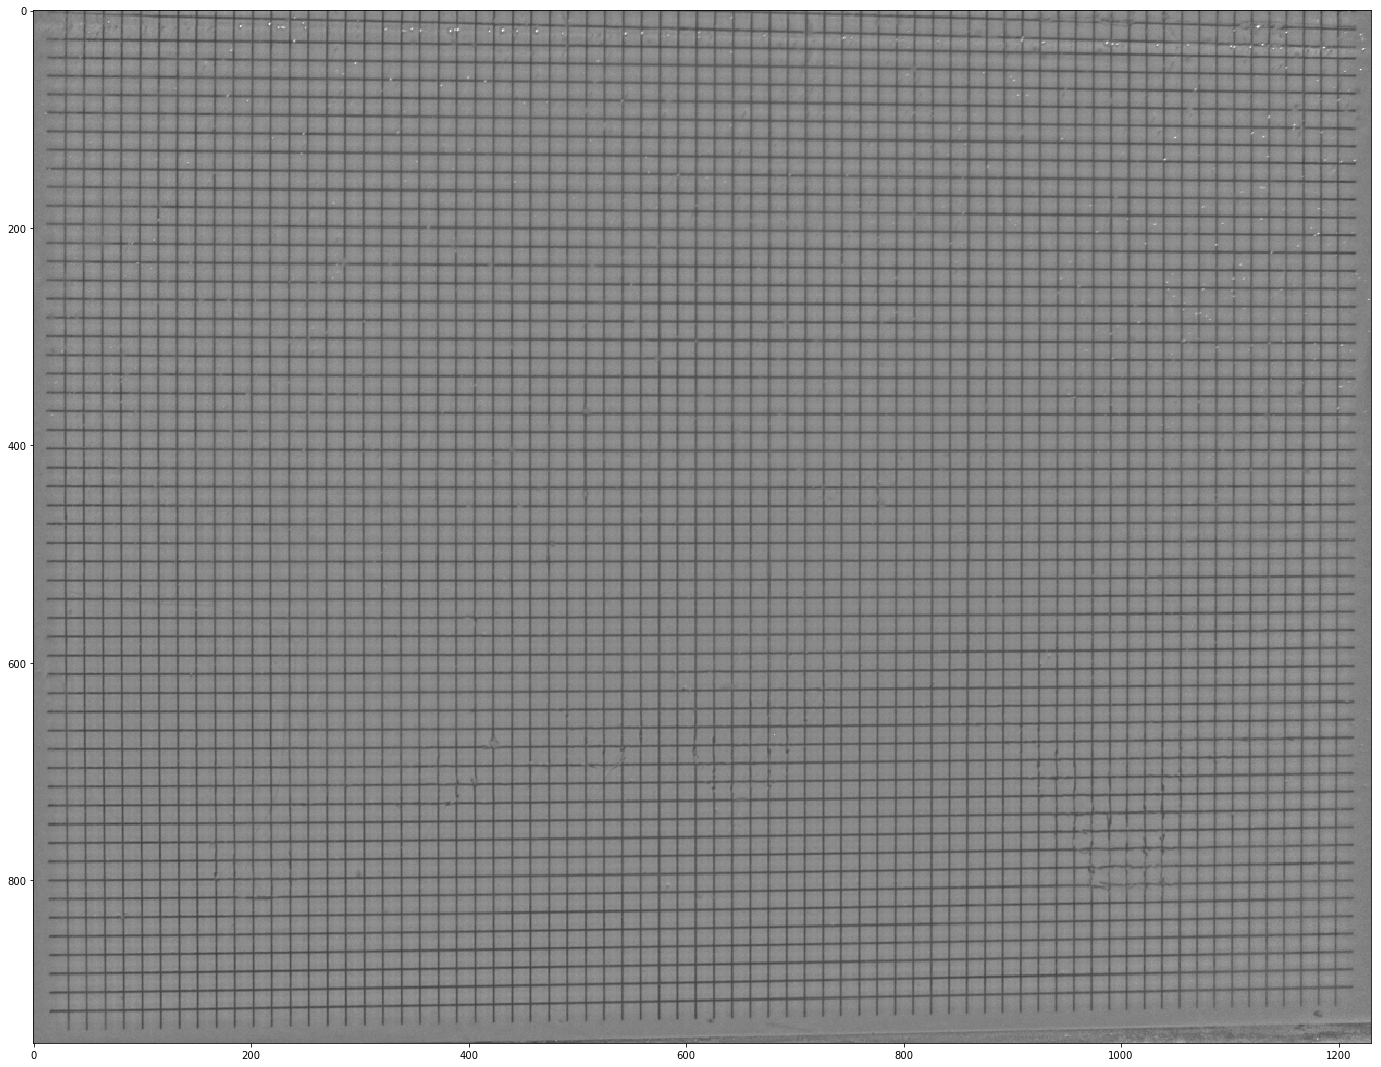

In [24]:
ratio=0.5/medianimg_new
plt.figure(figsize=(imdim[1]*0.02,imdim[0]*0.02))
plt.imshow(im1*ratio,cmap="gray",vmin=0,vmax=1)